In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [63]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', 25)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.api import OLS

import seaborn as sns
sns.set()

In [3]:
from sklearn import tree
%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.utils import shuffle

In [48]:
#lampsdata = pd.read_csv('data/crimes_with_lamps.csv')
#propertydata= pd.read_csv('data/crimes_with_property.csv')
#weatherdata = pd.read_csv('data/weather_boston.csv')
master = pd.read_csv('data/master_df.csv')
master = pd.get_dummies(master, columns=["DAY_OF_WEEK"])
#master.isna().sum()
master = master.dropna(how='any',axis=0) 




In [52]:
X, y = master.drop(['UCR_PART'], axis=1), master['UCR_PART']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#train, test = train_test_split(master, test_size=0.2, random_state=42)


# Fit Logistic Regression

In [56]:
logreg = LogisticRegression(C=100000, fit_intercept=True,solver='lbfgs')
logreg.fit(X_train.values, y_train.values);


print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1: 
 [[-2.68344806e-06 -5.67042741e-06  9.52776661e-06 -7.82054746e-07
  -1.65562945e-06 -7.31782279e-06 -1.88166816e-08 -1.99408595e-08
   3.84803489e-10 -3.99497866e-09 -3.13959395e-11 -2.87131007e-04
   3.15390120e-09 -2.05372058e-08 -1.93249666e-08 -1.58910477e-08
  -1.21413648e-08 -2.15086604e-08 -2.24136040e-08 -2.22141225e-08]
 [-1.70460851e-07  1.72550485e-12 -3.08483343e-12 -9.87422634e-13
  -4.29757009e-12 -1.32064690e-11  2.00471192e-13  6.45504721e-13
   5.81187223e-11  3.24238687e-09 -4.48725848e-17  1.56592891e-10
  -1.24152867e-13 -6.40341857e-15 -4.50246233e-14  1.52897200e-13
   1.08540797e-13 -4.19715133e-14 -3.64021905e-14 -8.89241745e-14]
 [-2.79704458e-06 -6.40254006e-10  1.07536679e-09 -1.02903460e-10
  -1.98565771e-10 -8.34127094e-10 -1.99587845e-12 -1.72730752e-12
   2.27616351e-10 -4.17067846e-08 -3.53754055e-15 -3.21493854e-08
  -1.28615526e-13 -2.27443349e-12 -2.01769597e-12 -2.42632937e-12
  -2.23574468e-12 -2.05252031e-12 -2.09940945e-12 -2.02

In [80]:
#Predict
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)


#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')


Training Set Accuracy: 49.96136341414951%
Testing Set Accuracy: 49.96278306945058%


In [81]:
x=np.linspace(np.min(X_test),np.max(X_test))
yhat = logreg.predict_proba(x.reshape(-1,1))[:,1]
print(yhat)

ValueError: X has 1 features per sample; expecting 20

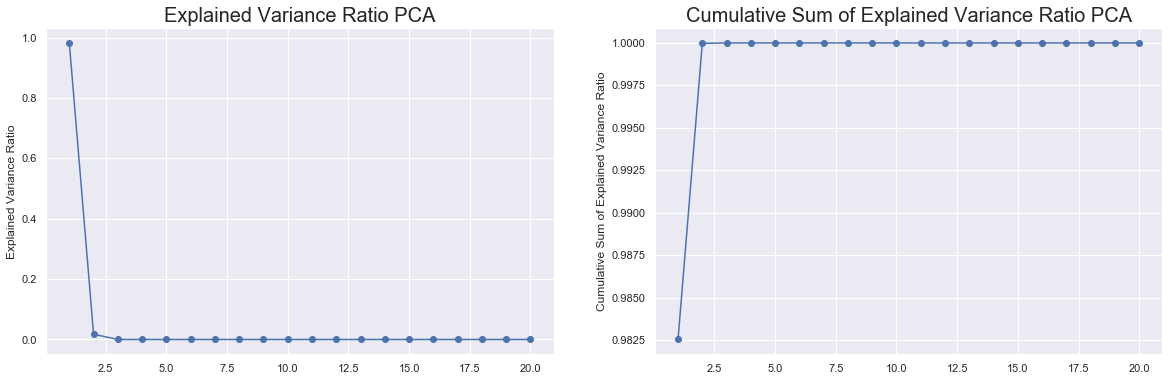

In [61]:
# Do PCA onto our training set and inspect
pca = PCA(n_components=20).fit(X_train)

fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax1, ax2 = ax.ravel()

ratio = pca.explained_variance_ratio_
ax1.plot(range(1,len(ratio)+1), ratio, 'o-')
ax1.set_title('Explained Variance Ratio PCA', fontsize=20)
ax1.set_ylabel('Explained Variance Ratio')

ratio = pca.explained_variance_ratio_
ax2.plot(range(1,len(ratio)+1), np.cumsum(ratio), 'o-')
ax2.set_title('Cumulative Sum of Explained Variance Ratio PCA', fontsize=20)
ax2.set_ylabel('Cumulative Sum of Explained Variance Ratio');

# Fit Random Forrest

In [68]:
#Find optimal depth of trees
mean_CV_acc = {}
all_CV_acc = {}
tree_depth_start, tree_depth_end, steps = 3, 20, 4
for i in range(tree_depth_start, tree_depth_end, steps):
    model = DecisionTreeClassifier(max_depth=i)
    score = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5, n_jobs=-1)
    all_CV_acc[i] = score
    mean_CV_acc[i] = score.mean()
    
best_depth = sorted(mean_CV_acc, key=mean_CV_acc.get, reverse=True)[0]
print("The best depth was found to be:", best_depth)

The best depth was found to be: 11


In [69]:
#Training
model = RandomForestClassifier(n_estimators=int(X_train.shape[1]/2), max_depth=best_depth)
model.fit(X_train, y_train)

#Predict
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#Perfromance Evaluation
acc_random_forest_training = accuracy_score(y_train, y_pred_train)*100
acc_random_forest_testing = accuracy_score(y_test, y_pred_test)*100

print("Random Forest: Accuracy, Training Set : {:0.2f}%".format(acc_random_forest_training))
print("Random Forest: Accuracy, Testing Set :  {:0.2f}%".format(acc_random_forest_testing))

Random Forest: Accuracy, Training Set : 51.23%
Random Forest: Accuracy, Testing Set :  50.55%


In [77]:
import collections, numpy
collections.Counter(y_pred_train)


Counter({'Part Three': 309079, 'Part Two': 4512, 'Part One': 3466})